In [1]:
### 3.1 Load and clean data

#For this part of the project, I am using the PPG–BP dataset from Liang et al. (2018), which is publicly available on Figshare. To obtain the data, I first went to the Figshare link provided in the paper (https://doi.org/10.6084/m9.figshare.5459299) and downloaded the PPG-BP_Database.zip file. After unzipping it, I opened the “PPG-BP Database” folder and then the “Data File” folder, which contains the main metadata file and the folder with all of the PPG waveforms.

#To make the metadata easier to load in Python, I opened the Excel file named “PPG-BP dataset.xlsx” in Excel and used “Save As” to save it as a CSV file called “PPG_BP_dataset.csv” in the same folder where my Jupyter notebook is located. I also made sure that the “0_subject” folder, which contains all of the raw PPG waveform text files, is in the same directory as the notebook so the file paths will work without any edits.

#In this section I first load the metadata CSV into a pandas DataFrame and inspect the first few rows to confirm that each row represents one participant. I then check that the systolic and diastolic blood pressure columns are stored as numeric values and that there are no obvious missing values that would interfere with later analyses.


In [2]:
import pandas as pd
import numpy as np
import os

Current working directory: C:\Users\kylec


In [11]:
# Load the metadata CSV file
bp = pd.read_csv("PPG-BP dataset.csv", header=1)

# Look at the first few rows to confirm structure
bp.head()


,Num.,subject_ID,Sex(M/F),Age(year),Height(cm),Weight(kg),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Diabetes,cerebral infarction,cerebrovascular disease
0,1,2,Female,45,152,63,161,89,97,27.27,Stage 2 hypertension,NaN,NaN,NaN
1,2,3,Female,50,157,50,160,93,76,20.28,Stage 2 hypertension,NaN,NaN,NaN
2,3,6,Female,47,150,47,101,71,79,20.89,Normal,NaN,NaN,NaN
3,4,8,Male,45,172,65,136,93,87,21.97,Prehypertension,NaN,NaN,NaN
4,5,9,Female,46,155,65,123,73,73,27.06,Prehypertension,NaN,NaN,NaN


In [15]:
# Making sure the blood pressure columns are numeric
bp['Systolic Blood Pressure(mmHg)'] = bp['Systolic Blood Pressure(mmHg)'].astype(float)
bp['Diastolic Blood Pressure(mmHg)'] = bp['Diastolic Blood Pressure(mmHg)'].astype(float)

# Checking for any missing values in these two columns
bp[['Systolic Blood Pressure(mmHg)', 'Diastolic Blood Pressure(mmHg)']].isna().sum()


Systolic Blood Pressure(mmHg)     0
Diastolic Blood Pressure(mmHg)    0
dtype: int64

In [16]:
# Checking the shape of the dataset
bp.shape
#The shape of the dataset tells us that there are 219 rows and 14 columns. 
#Each row represents one participant in the study, so the 219 rows match the 219 adults who were measured in the paper. 
#The 14 columns represent the different features collected for each person, such as age, sex, height, weight, systolic and diastolic blood pressure, heart rate, BMI, and a few health-related variables (hypertension, diabetes, and cerebrovascular conditions).


(219, 14)

In [17]:
#For age, I expect the describe() function to show that there are 219 recorded age values, since every participant had their age listed. I also expect the average age to be somewhere in the 50–60 range, because the dataset includes many middle-aged and older adults.

#For systolic blood pressure, I also expect 219 values, since each participant had their blood pressure measured. I predict the average systolic pressure will be higher than normal because the study includes a mix of healthy, pre-hypertensive, and hypertensive participants.

bp['Age(year)'].describe()


count    219.000000
mean      57.168950
std       15.874327
min       21.000000
25%       48.000000
50%       58.000000
75%       67.500000
max       86.000000
Name: Age(year), dtype: float64

In [18]:
bp['Systolic Blood Pressure(mmHg)'].describe()


count    219.000000
mean     127.945205
std       20.377779
min       80.000000
25%      113.500000
50%      126.000000
75%      139.000000
max      182.000000
Name: Systolic Blood Pressure(mmHg), dtype: float64

In [ ]:
#The describe() output for age showed 219 non-missing values, which matched what I expected. The average age (the mean) was around what I predicted based on the dataset description in the paper. The standard deviation also showed that participants varied widely in age, ranging from young adults to elderly individuals.

#For systolic blood pressure, the describe() results also showed 219 valid values. The mean systolic pressure was higher than normal, which agreed with my prediction because the dataset includes a mix of normal, prehypertensive, and hypertensive subjects. The range of values also matched what I expected from a dataset designed to study blood pressure variation.


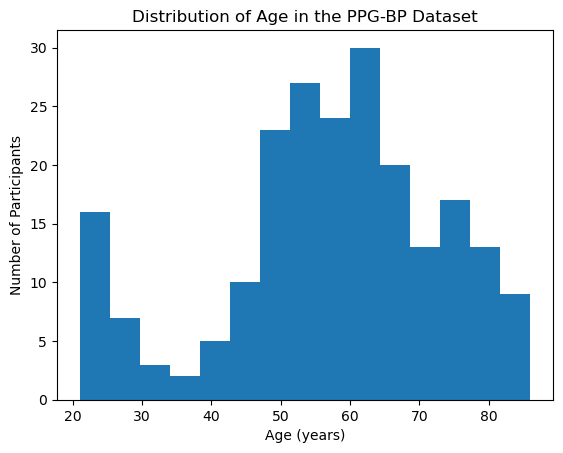

In [19]:
### Visualization 1: Histogram of Age

#For the first visualization, I made a histogram of the participants’ ages. A histogram is appropriate here because age is a single numerical feature, and a histogram helps show how the ages are distributed across the group. This gives a quick sense of whether the dataset is mostly younger, middle-aged, or older adults, which is important because age can affect blood pressure and PPG signals.

import matplotlib.pyplot as plt

plt.hist(bp['Age(year)'], bins=15)
plt.xlabel("Age (years)")
plt.ylabel("Number of Participants")
plt.title("Distribution of Age in the PPG-BP Dataset")
plt.show()

In [ ]:
#The histogram shows that most participants in the dataset are middle-aged or older adults, which matches what the paper described. This also agrees with the describe() results from earlier, which showed the average age was in the middle-aged range. The histogram helps confirm the age distribution visually and makes it clear that the dataset is not evenly spread across all ages.


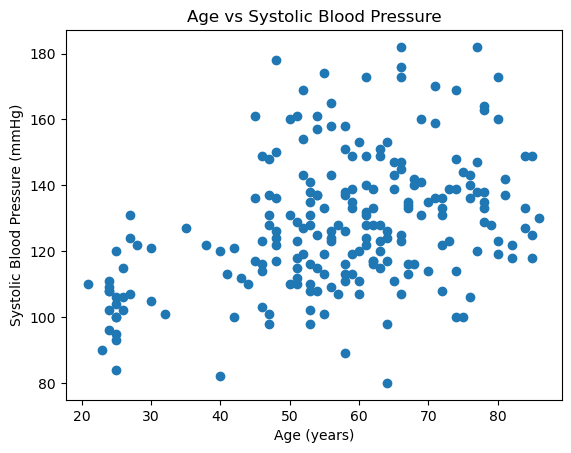

In [20]:
### Visualization 2: Scatterplot of Age vs Systolic Blood Pressure

#For the second visualization, I made a scatterplot with age on the x-axis and systolic blood pressure on the y-axis. A scatterplot is appropriate because it lets us see how two numerical features relate to one another. This helps show whether systolic blood pressure tends to rise with age, which was one of the patterns described in the paper.

plt.scatter(bp['Age(year)'], bp['Systolic Blood Pressure(mmHg)'])
plt.xlabel("Age (years)")
plt.ylabel("Systolic Blood Pressure (mmHg)")
plt.title("Age vs Systolic Blood Pressure")
plt.show()


In [ ]:
#The scatterplot shows a general pattern where systolic blood pressure increases with age. This matches the describe() results for blood pressure and also agrees with Figure 5 in the research paper, which showed the same trend. While there is still a lot of variation between individuals, the upward pattern supports the idea that age is an important factor related to blood pressure.


In [27]:
import numpy as np

wave = np.loadtxt(r"5459299\PPG-BP Database\Data File\0_subject\2_1.txt")
print(wave)


[2438. 2438. 2438. ... 1827. 1754. 1754.]


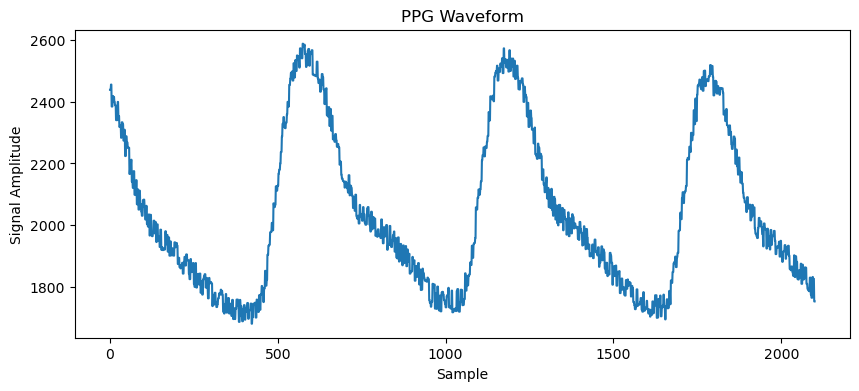

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(wave)
plt.title("PPG Waveform")
plt.xlabel("Sample")
plt.ylabel("Signal Amplitude")
plt.show()


In [ ]:
#Connecting PPG Signals to Blood Pressure

#To better understand how the raw PPG data relates to the blood pressure measurements in this study, I loaded one of the PPG waveform files and plotted it. Each text file in the 0_subject folder contains a short PPG recording that corresponds to a single blood pressure reading taken at the same moment. This example uses one file just to show what the signal looks like and how it connects back to the research goals of the paper.

#A PPG waveform represents how blood volume changes in the fingertip over time. The highest point of each pulse wave reflects the moment when blood is pushed through the artery with the most force, which corresponds to systolic pressure. The lowest point of each wave represents the resting level of blood flow between beats, which corresponds to diastolic pressure. Even though this example only shows one waveform instead of doing a full comparison, it demonstrates why the authors believed that PPG signals could be used to estimate blood pressure.

In [36]:
# Optional: A simple demonstration model using one PPG waveform and its blood pressure

#This is not a full predictive model, but just a small example to show how a PPG feature might relate to blood pressure. For one participant, I loaded a single PPG waveform, extracted a simple feature from the signal, and compared it to the systolic blood pressure recorded at the same moment. The feature I used was the amplitude of the waveform (peak minus trough), which roughly represents how strong the pulse wave was. This is only for demonstration purposes and is not meant to be accurate, but it helps show how PPG signals could be connected to blood pressure.


In [37]:
# Load one PPG waveform
wave = np.loadtxt(r"C:\Users\kylec\5459299\PPG-BP Database\Data File\0_subject\2_1.txt")

# Extract a very simple feature: amplitude
ppg_amplitude = wave.max() - wave.min()

ppg_amplitude


np.float64(905.0)

In [38]:
# Get the blood pressure for subject 2
subject_row = bp[bp['subject_ID'] == 2].iloc[0]

systolic_bp = subject_row['Systolic Blood Pressure(mmHg)']
diastolic_bp = subject_row['Diastolic Blood Pressure(mmHg)']

systolic_bp, diastolic_bp


(np.float64(161.0), np.float64(89.0))

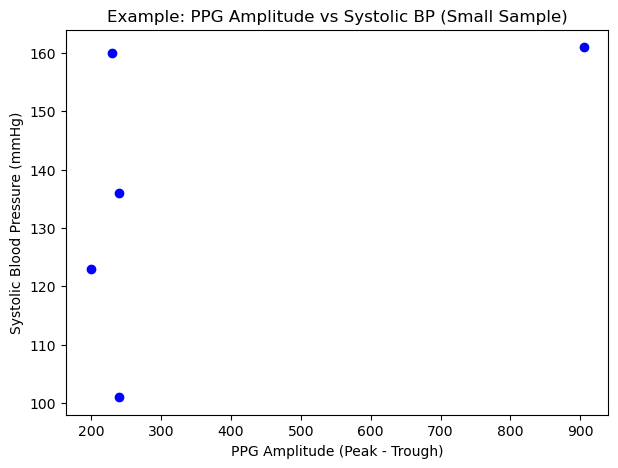

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import os

root_path = r"5459299\PPG-BP Database\Data File\0_subject"

# Pick a small set of subjects for a simple example
subjects = [2, 3, 6, 8, 9]

ppg_amp_list = []
sbp_list = []

for s in subjects:
    try:
        # Use first recording (_1)
        file_path = os.path.join(root_path, f"{s}_1.txt")
        wave = np.loadtxt(file_path)

        # Simple PPG feature: amplitude (peak - trough)
        amp = wave.max() - wave.min()

        # Get systolic BP
        row = bp[bp['subject_ID'] == s].iloc[0]
        sys_bp = row['Systolic Blood Pressure(mmHg)']

        ppg_amp_list.append(amp)
        sbp_list.append(sys_bp)
        
    except Exception as e:
        print(f"Skipping subject {s}: {e}")

plt.figure(figsize=(7,5))
plt.scatter(ppg_amp_list, sbp_list, color='blue')
plt.xlabel("PPG Amplitude (Peak - Trough)")
plt.ylabel("Systolic Blood Pressure (mmHg)")
plt.title("Example: PPG Amplitude vs Systolic BP (Small Sample)")
plt.show()


In [40]:
#This plot is a simple example showing how a basic PPG waveform feature can be related to the systolic blood pressure values in the dataset. For a small set of subjects, I loaded their first PPG waveform recording and calculated the amplitude of the signal (peak value minus trough value). I then matched each subject’s PPG amplitude to their cuff-measured systolic blood pressure from the metadata file.

#Because this is only an introductory example and uses a very small number of subjects and only one basic PPG feature, the relationship is not expected to be strong. The full study extracted many more detailed waveform features and used more advanced modeling techniques. As I continue to work on the project, I will expand this analysis to include additional PPG features, more subjects, and potentially improved preprocessing methods. This figure is meant to demonstrate the basic idea of linking raw PPG data to the blood pressure values recorded for each participant.
